<a href="https://colab.research.google.com/github/basakozgurr/veri_bilimi_exam_database/blob/main/college_exam_results_sat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries 📜 1️⃣

In [8]:
import pandas as pd                          #önemli kütüphaneleri ekleme
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and Check Data ✔️2️⃣

In [9]:
df=pd.read_csv("archive.zip") #dosyayı ekleme

In [7]:
df #kaç satır kaç sütun olduğunu kontrol etme

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
456,75X012,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN
457,75X754,P754 X - Jeffrey M. Rapport School for Career ...,NaN,NaN,NaN,NaN
458,76K460,John Jay High School,9.0,390.0,381.0,398.0


In [10]:
df.head()     #doğru olup olmadığını görmek için kontrol zamanı

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN


In [11]:
df.dtypes        #verilerin türlerini öğrenmek için kullandığımız kod

DBN                       object
School Name               object
Number of Test Takers    float64
Critical Reading Mean    float64
Mathematics Mean         float64
Writing Mean             float64
dtype: object

In [12]:
df.columns   #sütunların veri yapılarını öğrenmek için kod

Index(['DBN', 'School Name', 'Number of Test Takers', 'Critical Reading Mean',
       'Mathematics Mean', 'Writing Mean'],
      dtype='object')

In [14]:
df.isnull().sum()     #verilerdeki boşlukları kontrol ederiz

DBN                       0
School Name               0
Number of Test Takers    74
Critical Reading Mean    74
Mathematics Mean         74
Writing Mean             74
dtype: int64

<Axes: >

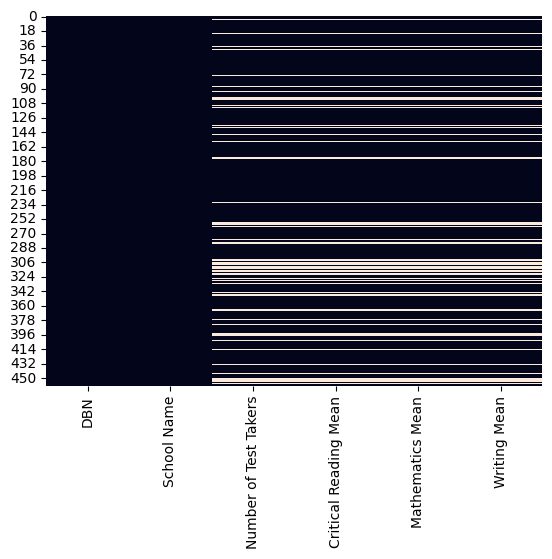

In [15]:
sns.heatmap(df.isnull(),cbar=False)           #verilerdeki boşlukları görselleştirir

In [19]:
check_df(df)      #veri setini inceleme

##################### Shape #####################
(460, 6)

##################### Columns #####################
Index(['DBN', 'School Name', 'Number of Test Takers', 'Critical Reading Mean',
       'Mathematics Mean', 'Writing Mean'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DBN                    460 non-null    object 
 1   School Name            460 non-null    object 
 2   Number of Test Takers  386 non-null    float64
 3   Critical Reading Mean  386 non-null    float64
 4   Mathematics Mean       386 non-null    float64
 5   Writing Mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.7+ KB
##################### Types #####################
DBN                       object
School Name               object
Numb

In [20]:
df.describe()          #Veri setinin temel istatistiksel özelliklerinin incelenmesi

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
count,386.000000,386.000000,386.000000,386.000000
mean,103.658031,404.248705,412.935233,397.689119
std,145.264496,56.815631,64.990976,57.762584
min,7.000000,291.000000,281.000000,285.000000
25%,35.000000,370.000000,372.000000,364.000000
50%,54.000000,392.500000,394.500000,383.000000
75%,92.750000,419.000000,429.750000,414.000000
max,1047.000000,674.000000,735.000000,678.000000


Variable Description 🚀3️⃣

***DBN  ***:the combination of the District Number, the letter code for the borough, and the number of the school.  

***School Name***  : name of school    

***Number of Test Takers***  : number of test takers(SAT)

***Critical Reading Mean *** : reading skills in your exam

***Mathematics Mean  ***     : mathematic skills in your exam

***Writing Mean   ***        : writing skills in your exam

Univarite Variable Analysis ⚠️

In [22]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [23]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)       #Kategorik, Sayısal ve Kardinal Verilerin Tespiti


##################### Categoric #####################
[]

##################### Numeric #####################
['Number of Test Takers', 'Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']

##################### Categoric But Cardinal #####################
['DBN', 'School Name']

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 460
Variables: 6
cat_cols: 0
num_cols: 4
cat_but_car: 2
num_but_cat: 0


Kategorik ve Sayısal Değişkenlerin Görselleştirilmesi

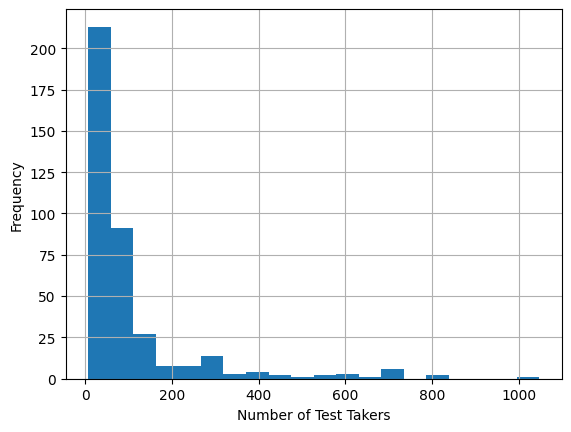

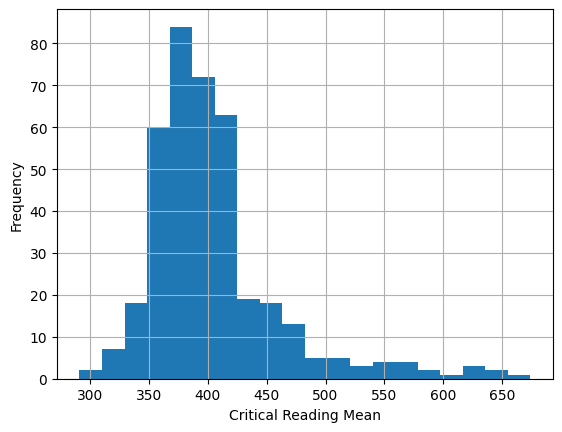

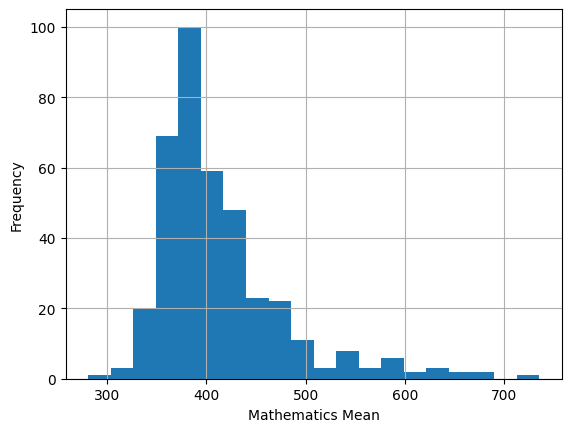

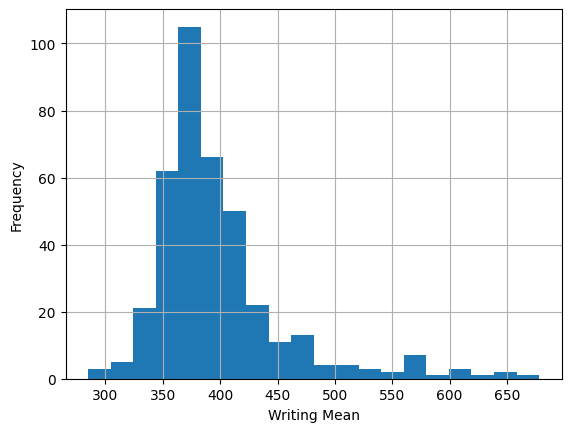

In [24]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

Data Visualization 📊4️⃣

ValueError: x and y must be the same size

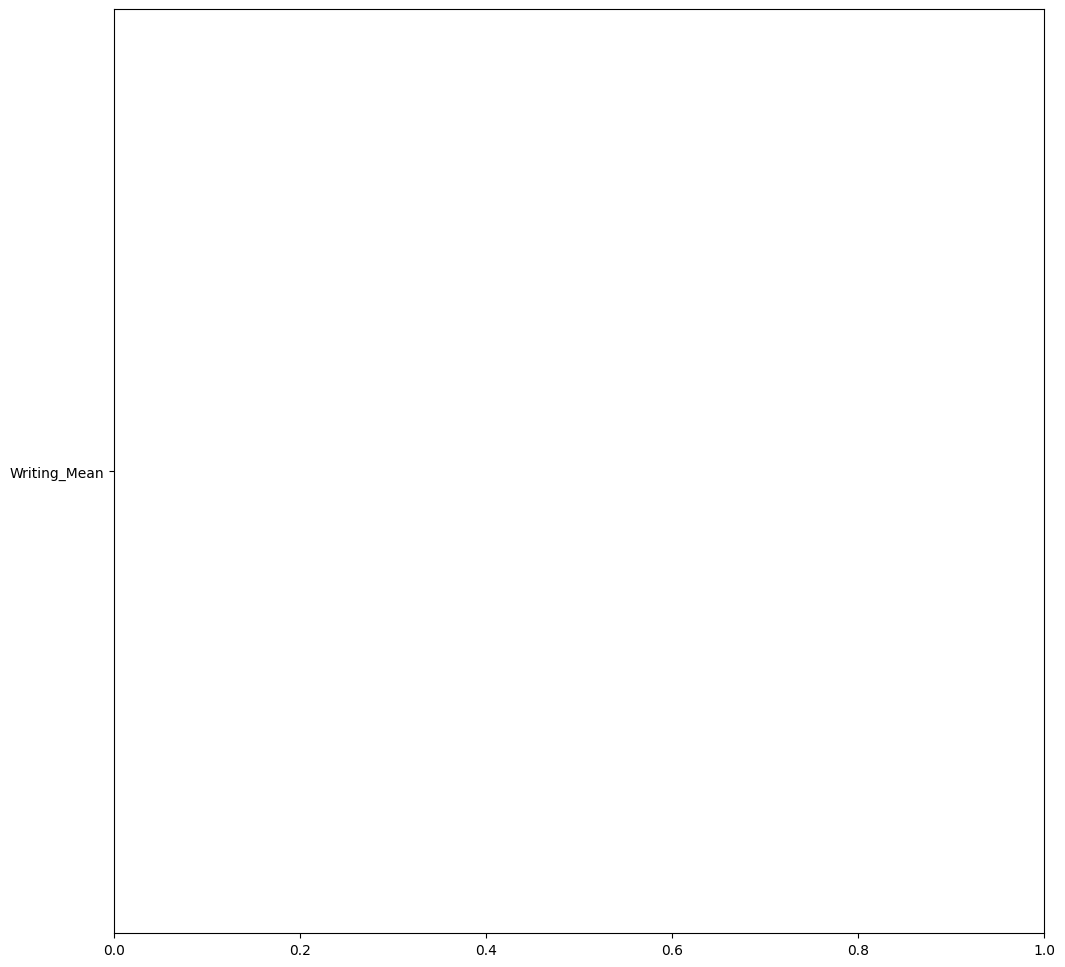

In [34]:
#MATHPLOTLİB
plt.figure(figsize=(12, 12))
plt.scatter('Critical Reading Mean', 'Writing_Mean', data=df)  # Veri çerçevesini "df" olarak adlandırdım
plt.xticks(rotation=90)
plt.xlabel('Critical Reading Mean')
plt.ylabel('Writing Mean')
plt.show()

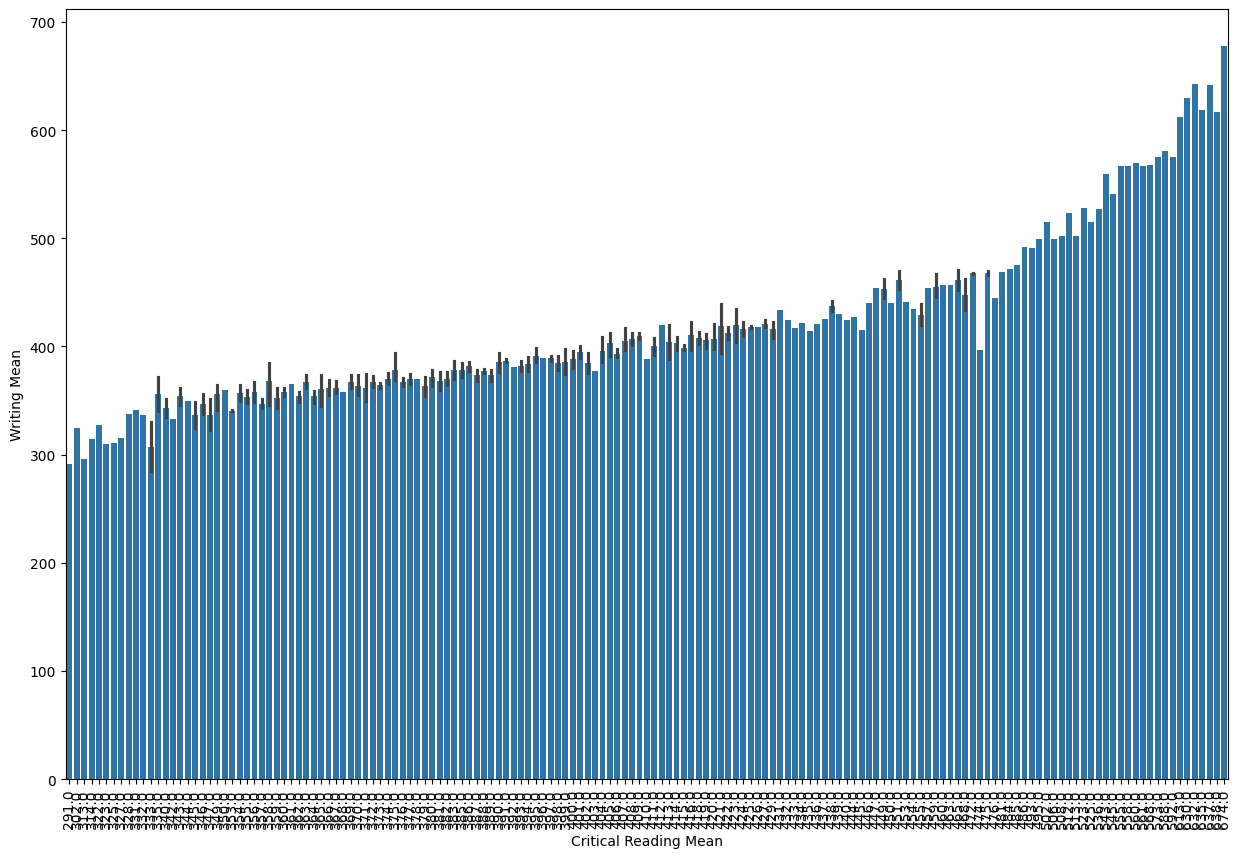

In [35]:
#SEABORN
plt.figure(figsize=(15,10))
ax = sns.barplot(x="Critical Reading Mean", y="Writing Mean", data=df)
plt.xticks(rotation= 90);

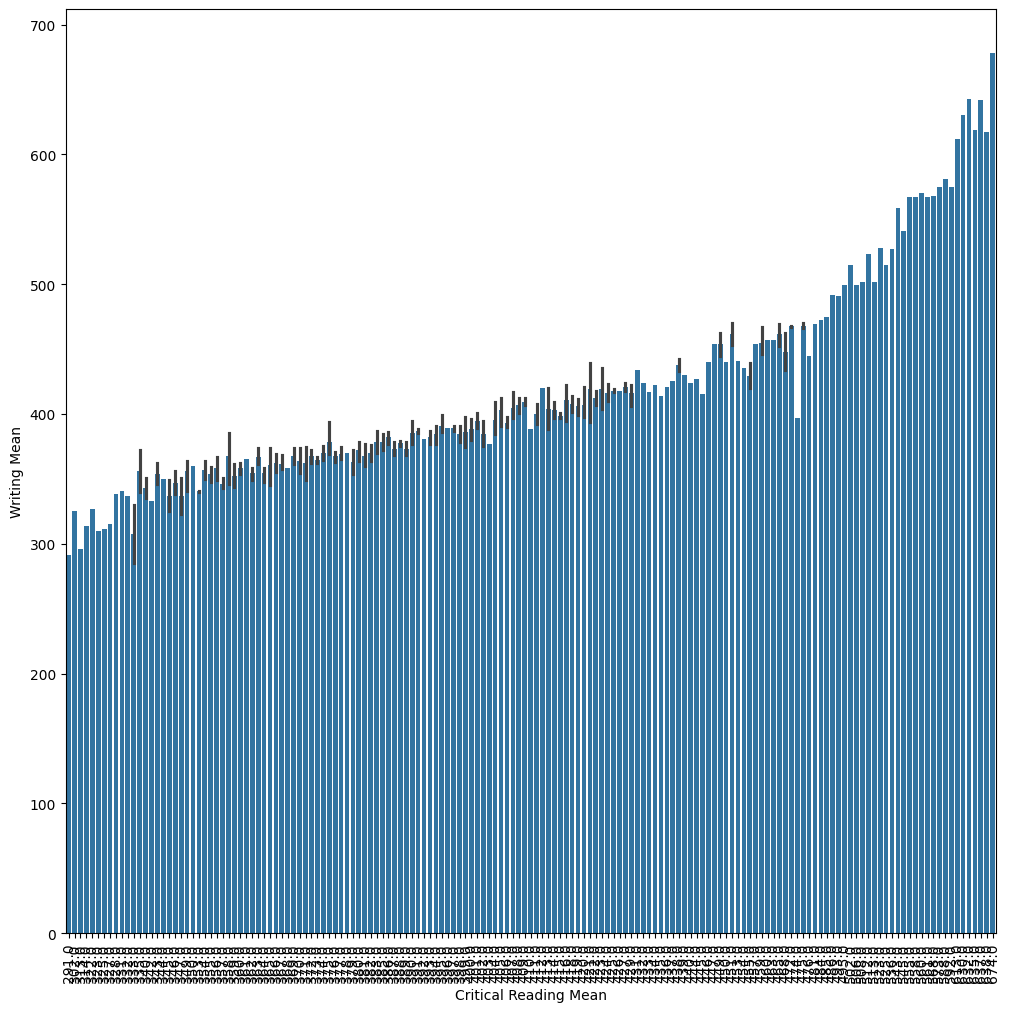

In [36]:
ax = plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
ax = sns.barplot(x="Critical Reading Mean", y="Writing Mean", data=df)

Değişkenler Arası İlişkiler 🤝5️⃣

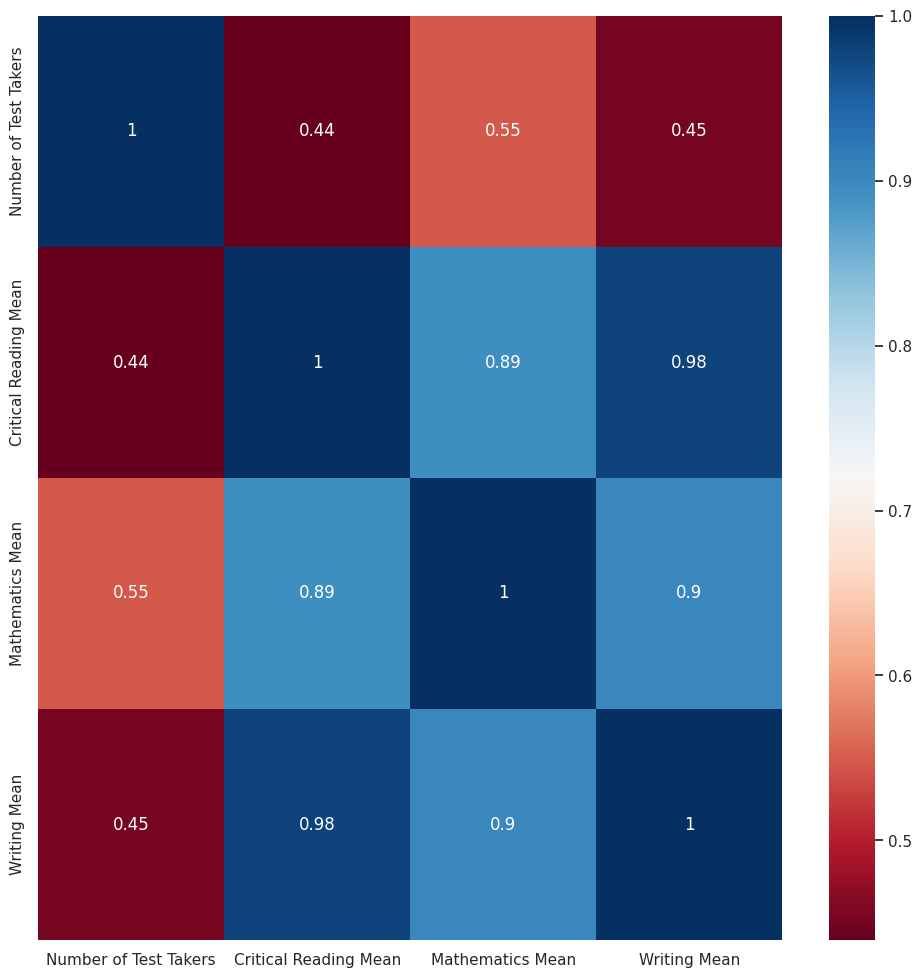

In [38]:
corr = df[num_cols].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

Feature Engineering 🤝6️⃣

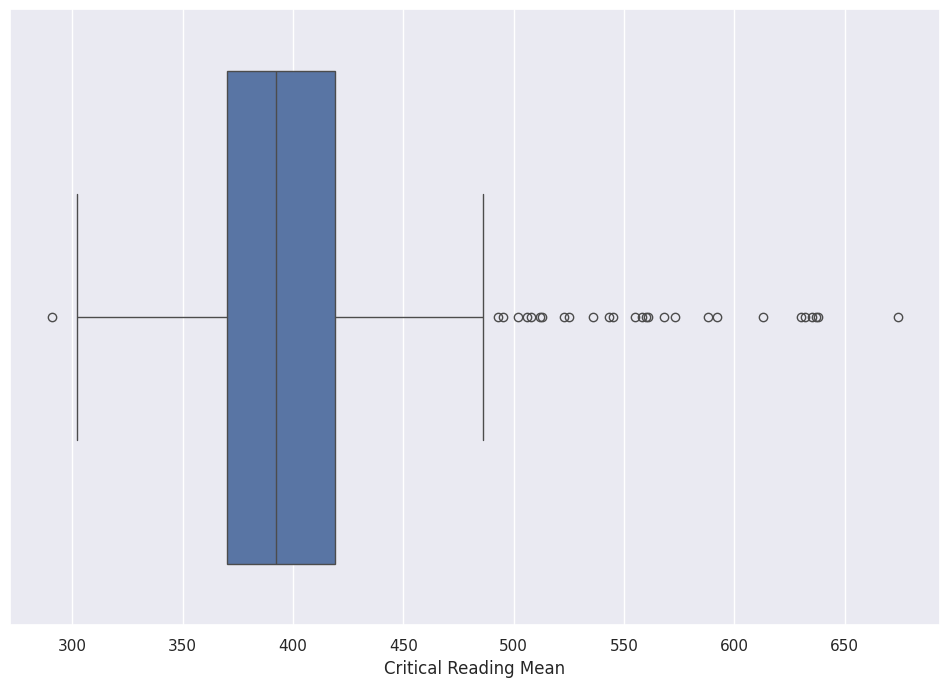

In [39]:
# Grafik Teknikle Aykırı Değerler
###################
plt.figure(figsize=(12,8))
sns.boxplot(x=df["Critical Reading Mean"])
plt.show(block=True)

In [40]:
# Herhangi bir sütundaki verinin outlier olması için alt ve üst limiti
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [41]:
outlier_thresholds(df,"Critical Reading Mean")

(296.5, 492.5)

In [ ]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(
            axis=None):
        return True
    else:
        return False

In [46]:
def check_outlier(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataframe[(dataframe[column_name] < lower_bound) | (dataframe[column_name] > upper_bound)]
    return outliers

outliers = check_outlier(df, "Writing Mean")
print(outliers)

        DBN                                        School Name  \
6    01M539       New Explorations into Sci, Tech and Math HS    
8    01M696                    BARD HIGH SCHOOL EARLY COLLEGE    
24   02M408                Professional Performng Arts School    
25   02M411                 Baruch College Campus High School    
26   02M412    New York City Laboratory School Collab Studies    
29   02M416                     ELEANOR ROOSEVELT HIGH SCHOOL    
30   02M418                            Millennium High School    
42   02M475                            STUYVESANT HIGH SCHOOL    
57   02M565                                     URBAN ACADEMY    
76   03M479                                     BEACON SCHOOL    
77   03M485                      LAGUARDIA HIGH SCH MUSIC ART    
99   05M692  High School For Math Science Engineering City ...   
173  10X342              International School of Liberal Arts    
185  10X445                      BRONX HIGH SCHOOL OF SCIENCE    
193  10X69

***Eksik Değerler***

In [47]:
df.isnull().sum()

DBN                       0
School Name               0
Number of Test Takers    74
Critical Reading Mean    74
Mathematics Mean         74
Writing Mean             74
dtype: int64